B1: thư viện

In [1]:

!pip install pandas

In [2]:
import numpy as np
# hỗ trợ cho việc tính toán các mảng nhiều chiều
import pandas as pd
# thao tác và phân tích dữ liệu

import matplotlib.pyplot as plt
# vẽ biểu đồ, đồ thị
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
# hàm đưa dữ liệu về giá trị (0,1)
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Gộp dữ liệu vào chuyển thành dữ liệu time series
from keras.models import Sequential
# khởi tạo mạng neurol
from keras.layers import Dense
# một lớp để chuyển dữ liệu từ lớp input vào model ????
from keras.layers import LSTM
# mô hình LSTM
from keras.layers import Dropout
# giúp bỏ bớt các node, giúp lọc lại những node có thông tin cần thiết
from tensorflow import keras
# from datetime import datatime
plt.style.use("fivethirtyeight")
# style của thư viện mathplotlib
import warnings
warnings.filterwarnings("ignore")
# Những thư viện cần dùng
from keras.losses import MeanSquaredError

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Hocmay


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ACB_Close.h5   CMG_Close.h5   ELC_Close.h5   KDH_Close.h5   PDR_Volume.h5  VCB_Volume.h5
ACB.csv        CMG.csv	      ELC.csv	     KDH.csv	    PNJ_Close.h5   VIC_Close.h5
ACB_High.h5    CMG_High.h5    ELC_High.h5    KDH_High.h5    PNJ.csv	   VIC.csv
ACB_Low.h5     CMG_Low.h5     ELC_Low.h5     KDH_Low.h5     PNJ_High.h5    VIC_High.h5
ACB_Open.h5    CMG_Open.h5    ELC_Open.h5    KDH_Open.h5    PNJ_Low.h5	   VIC_Low.h5
ACB_Volume.h5  CMG_Volume.h5  ELC_Volume.h5  KDH_Volume.h5  PNJ_Open.h5    VIC_Open.h5
BID_Close.h5   CTG_Close.h5   FPT_Close.h5   Model	    PNJ_Volume.h5  VIC_Volume.h5
BID.csv        CTG.csv	      FPT.csv	     MSN_Close.h5   PVC_Close.h5   VNM_Close.h5
BID_High.h5    CTG_High.h5    FPT_High.h5    MSN.csv	    PVC.csv	   VNM.csv
BID_Low.h5     CTG_Low.h5     FPT_Low.h5     MSN_High.h5    PVC_High.h5    VNM_High.h5
BID_Open.h5    CTG_Open.h5    

B2: Tải dữ liệu

In [ ]:
# Danh sách mã cổ phiếu có sẵn đang train
available_tickers = ["ACB", "BID", "CMC", "CMG", "CTG", "DXG", "FPT", "PVC",
                     "MSN", "PNJ", "PDR", "ELC", "KDH", "GAS", "VCB", "VIC", "VNM"]

# Chọn mã cổ phiếu
Macophieu = "VNM"

# Chọn thuộc tính
prop = "Close"  #"Open", "High", "Low", "Close", "Volume"

folder_path = "/content/drive/MyDrive/Hocmay"

file_path = f"{folder_path}/{Macophieu}.csv"

try:
    # Đọc dữ liệu từ file CSV
    data = pd.read_csv(file_path)

    if prop not in data.columns:
        raise ValueError(f"Cột '{prop}' không tồn tại trong dữ liệu.")

    # Chuyển đổi cột 'Date' sang dạng datetime
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        data = data.sort_values(by='Date')

    # Lọc dữ liệu chỉ lấy cột Date và prop
    selected_data = data[['Date', prop]]

    # Hiển thị 5 dòng đầu tiên
    print(selected_data.head())

except FileNotFoundError:
    print(f"{Macophieu}.csv không tồn tại trong thư mục {folder_path}.")
except ValueError as e:
    print(f"Lỗi: {e}")
except Exception as e:
    print(f"Lỗi không xác định: {e}")


        Date  Close
0 2014-04-01  36420
1 2014-04-02  36420
2 2014-04-03  37220
3 2014-04-04  37470
4 2014-04-07  38250


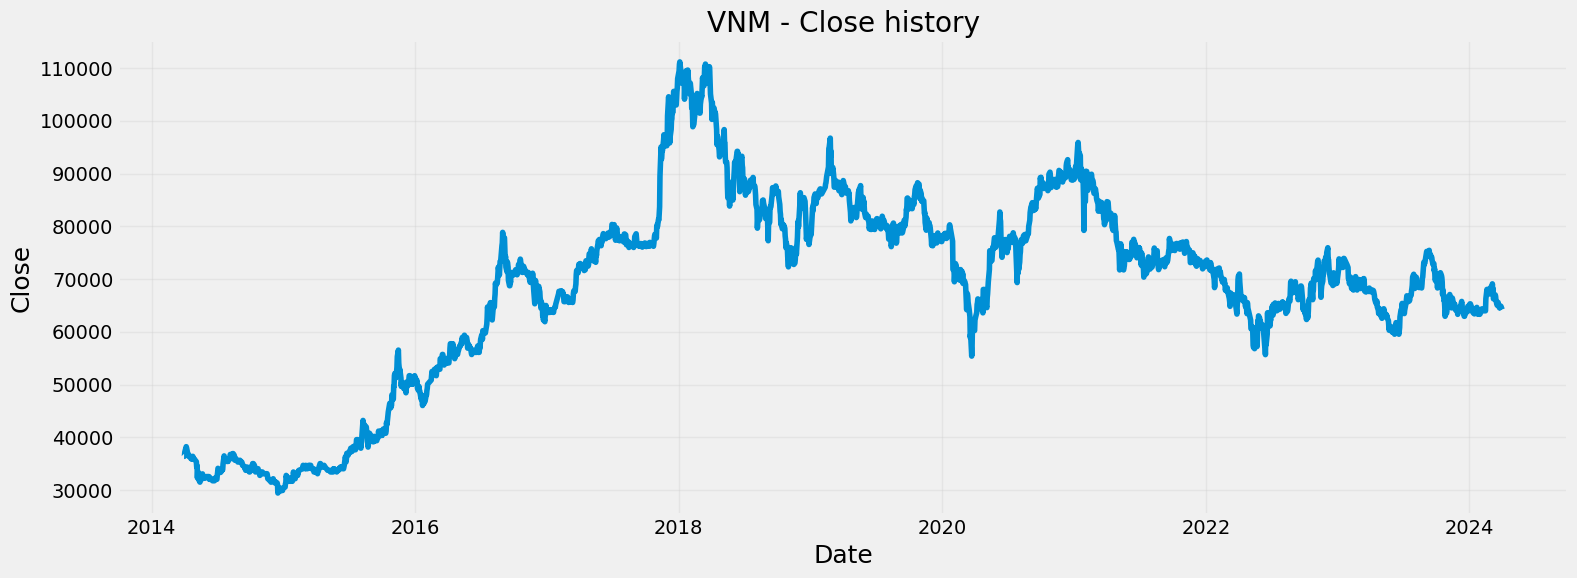

In [6]:
plt.figure(figsize = (16,6))
plt.plot(data['Date'], data[prop])
plt.title(f"{Macophieu} - {prop} history")
plt.xlabel('Date', fontsize = 18)
plt.ylabel(f'{prop}', fontsize = 18)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

tu 2014 - 2024 lai:



Thống kê mô tả của Close:
count      2499.000000
mean      68318.885954
std       18120.340015
min       29460.000000
25%       61150.000000
50%       71080.000000
75%       79665.000000
max      111180.000000
Name: Close, dtype: float64


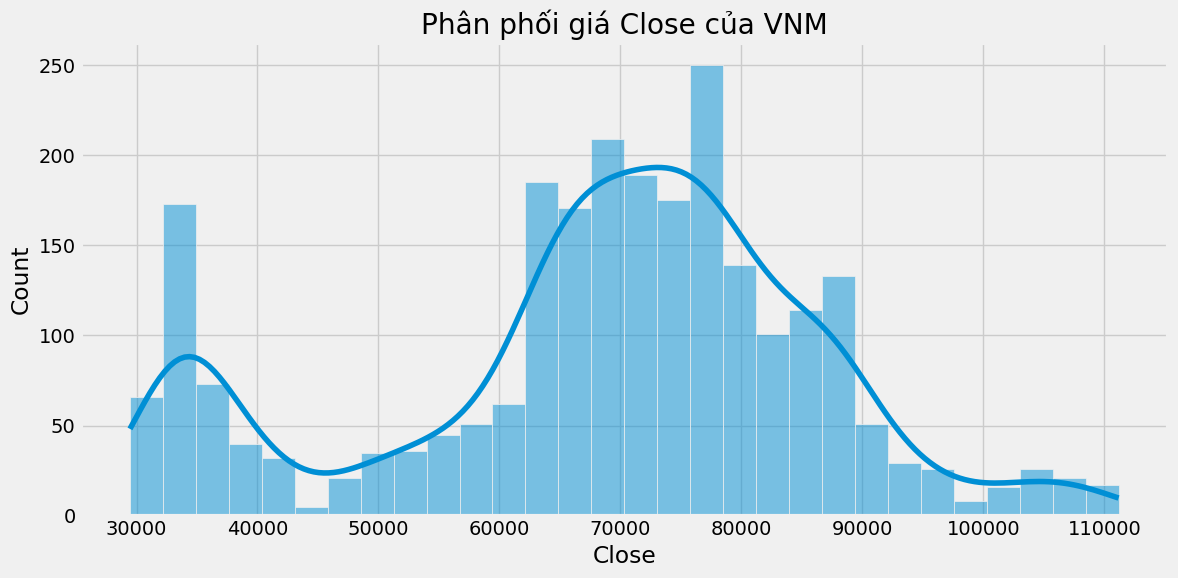

In [7]:
# Thêm statistics analysis cơ bản trên dữ liệu
print(f"\nThống kê mô tả của {prop}:")
print(data[prop].describe())

# Visualize distribution
plt.figure(figsize=(12, 6))
sns.histplot(data[prop], kde=True)
plt.title(f"Phân phối giá {prop} của {Macophieu}")
plt.tight_layout()
plt.show()

B3: Tiền xử lý dữ liệu

In [8]:
data_end = int(np.floor(0.8*(data.shape[0])))
# lấy cái mốc là data_end theo tử lệ 2:8
train = data[0:data_end][prop]
# lấy 80% là giá mỏ cho tập train
test = data[data_end:][prop]
# lấy 20% data là giá mở cho tập test
date_test = data[data_end:]['Date']
# lấy 20% là ngày trùng vs tập test

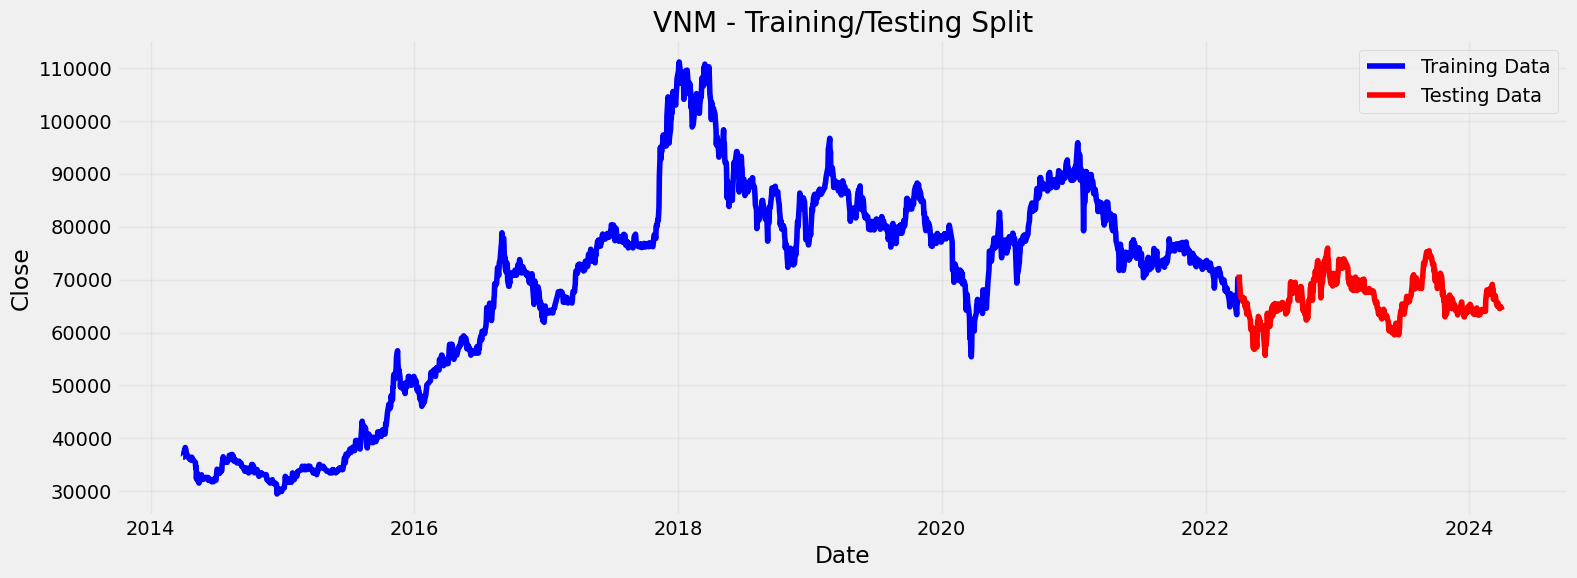

Số lượng dữ liệu train: 1999
Số lượng dữ liệu test: 500


In [9]:
# Hiển thị phân chia dữ liệu
plt.figure(figsize=(16, 6))
plt.plot(data['Date'][:data_end], train, 'b-', label='Training Data')
plt.plot(data['Date'][data_end:], test, 'r-', label='Testing Data')
plt.title(f"{Macophieu} - Training/Testing Split")
plt.xlabel('Date')
plt.ylabel(f'{prop}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Số lượng dữ liệu train: {len(train)}")
print(f"Số lượng dữ liệu test: {len(test)}")

In [10]:
train = train.values.reshape(-1)
test = test.values.reshape(-1)
date_test = date_test.values.reshape(-1)
# chuyển ma trận sao cho phù hợp với đầu vào của keras

B4: Chuyển dữ liệu thành dạng Time Series

In [11]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()
# khởi tạo các list x, y trổng để lưu data test, train
# time_step = 30 số lượng ngày đưa vào, num_predict = 1 số lượng đầu ra
  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])
# y(dự đoán của 30 đầu vào) = f(x(giá open 30 ngày)w(giá trị cần cải thiện trong model) + bias(giá trị cần cải thiện trong model))
# đưa vào giá của 30 ngày tương ứng với 1 state và đầu ra y mũ cho 1 node tưởng tự n data còn lại
# đưa giá trị vào mảng x_train(giá mở của 80% tập data ngày trước để đưa vào cho máy học), y_train(giá mở của ngày thứ 31)
  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    if i + time_step + num_predict <= len(date):
      date_test.append(date[i+time_step:i+time_step+num_predict][0])  # Chỉ lấy giá trị đầu tiên để tránh mảng lồng nhau

# Xử lý đưa data vào list tương tự như tập train
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)
  # chuyển dữ liệu thành dạng mảng

In [12]:
# gọi hàm dựa data vào mảng train test time_step num_predict,

x_train, y_train, x_test, y_test, date_test = get_data(train,test,30,1, date_test)

# chuyển về dạng ma trận đưa vào minmaxscaler()
x_train = x_train.reshape(-1,30)
x_test = x_test.reshape(-1,30)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()

# gọi hàm scaler để nén hoặc giải nén data về khoảng (0,1) để máy hiểu góp phần tăng tốc độ máy học
# fit_transform nén data lại cho model cho 4 ma trận x, y_train x,y test
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

In [13]:
# chuyển về dạng ma trận đưa vào keras() thêm một chiều thứ 3 để có bias => để thành ma trận 3D cho phù hợp với bài toán

# Reshape lai cho x_train
x_train = x_train.reshape(-1,30,1)
y_train = y_train.reshape(-1,1)

#reshape lai cho test
x_test = x_test.reshape(-1,30,1)
y_test = y_test.reshape(-1,1)
date_test = date_test.reshape(-1,1)

B5: Xây dựng mô hình

In [14]:
# 1 lớp là giá của 30 ngày (n_input)
# n_feature số lượng cột ở đây là giá mở
# return_sequences trả về chuỗi

n_input = 30
n_features = 1

# Khởi tạo mạng neurol
model = Sequential()
model.add(LSTM(units = 50, input_shape=(n_input, n_features), return_sequences=True))
# trả về dạng chuỗi để đưa vào layer tiếp theo
# true thì nó trả về chuỗi các hidden state false thì trả về output
model.add(Dropout(0.3))
# lớp thứ hai
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.3))
# lớp thứ ba
model.add(LSTM(units = 50))
model.add(Dropout(0.3))
# đưa về lớp cuối cùng 1 node
model.add(Dense(1))
# đưa vào xác định hàm lỗi(loss function) 'mse' và hàm tối ưu(vd gradient) 'adam'
model.compile(optimizer ='adam', loss ='mse')

# in tổng model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

B6: Huấn luyện

In [ ]:
%cd /content/drive/MyDrive/Hocmay
# fit đưa tất cả vào model
model.fit(x_train, y_train, epochs=200, validation_split=0.2, verbose=1, batch_size=30)
model.save(f'{Macophieu}_{prop}.h5')

/content/drive/MyDrive/Hocmay
Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0789 - val_loss: 0.0012
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0053 - val_loss: 0.0011
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0060 - val_loss: 8.6109e-04
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0050 - val_loss: 9.2618e-04
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0055 - val_loss: 9.5988e-04
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0049 - val_loss: 8.3635e-04
Epoch 10/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0044 - val_loss: 7.6628e-04
Epoch 11/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0040 - val_loss: 0.0011
Ep

Error: The 'history' variable is not defined. Make sure the model training completed successfully.


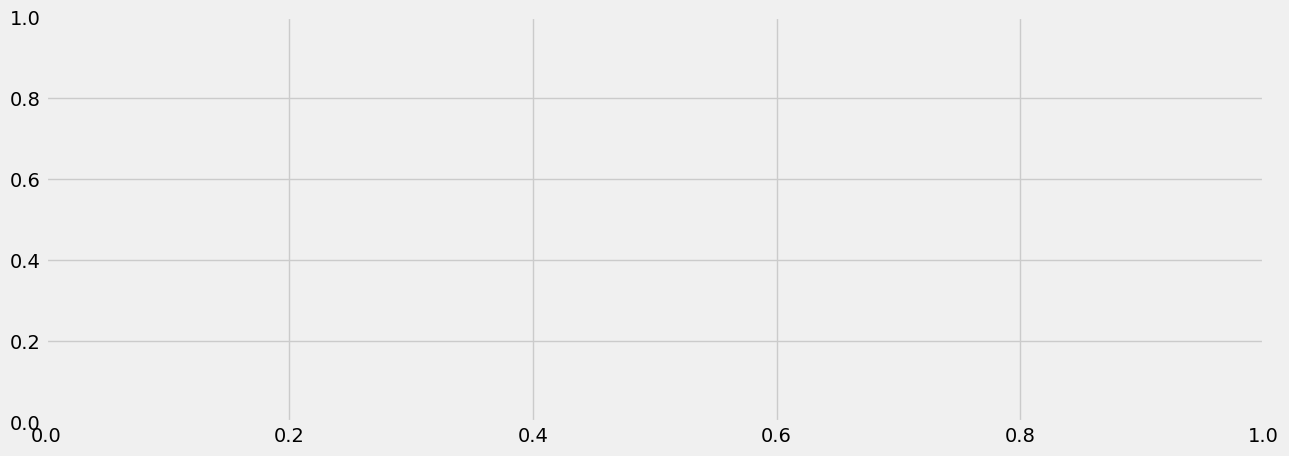

In [15]:
try:
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.ylabel('Loss (MSE)')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except NameError:
    print("Error: The 'history' variable is not defined. Make sure the model training completed successfully.")
except Exception as e:
    print(f"Error plotting training history: {e}")


B7: Dự đoán và kiểm tra mô hình

In [24]:
%cd /content/drive/MyDrive/Hocmay
# Test model vừa train
model = keras.models.load_model(f'{Macophieu}_{prop}.h5', custom_objects={"mse": MeanSquaredError()})
# load model
test_output = model.predict(x_test)
# lấy tập x_test cho vào model ra test_output là data dự đoán

# giải nén dữ liệu từ (0,1) ra giá thực tế
# test_1 = scaler.inverse_transform(test_output)
# test_2 =scaler.inverse_transform(y_test)

# Biến đổi ngược lại tỷ lệ ban đầu
test_predictions = scaler.inverse_transform(test_output)
test_actual = scaler.inverse_transform(y_test)

# Chuyển đổi date_test thành datetime để vẽ đồ thị tốt hơn
date_test_pd = pd.to_datetime(date_test.flatten())

# Tạo DataFrame cho kết quả
results_df = pd.DataFrame({
    'Date': date_test_pd,
    'Actual': test_actual.flatten(),
    'Predicted': test_predictions.flatten()
})

# Tính toán lỗi dự đoán
results_df['Error'] = results_df['Actual'] - results_df['Predicted']
results_df['Absolute Error'] = np.abs(results_df['Error'])
results_df['Squared Error'] = results_df['Error'] ** 2
results_df['Percent Error'] = np.abs(results_df['Error'] / results_df['Actual']) * 100


/content/drive/MyDrive/Hocmay
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [25]:
# Hiển thị bảng kết quả
print("\nKết quả dự đoán (5 dòng đầu tiên):")
print(results_df.head().to_string())


Kết quả dự đoán (5 dòng đầu tiên):
        Date   Actual     Predicted        Error  Absolute Error  Squared Error  Percent Error
0 2022-05-19  59580.0  59640.703125   -60.703125       60.703125   3.684869e+03       0.101885
1 2022-05-20  58810.0  59896.378906 -1086.378906     1086.378906   1.180219e+06       1.847269
2 2022-05-23  57240.0  59538.738281 -2298.738281     2298.738281   5.284198e+06       4.015965
3 2022-05-24  59480.0  58760.515625   719.484375      719.484375   5.176578e+05       1.209624
4 2022-05-25  62070.0  58675.226562  3394.773438     3394.773438   1.152449e+07       5.469266


In [26]:
# Tính toán số liệu
mae = mean_absolute_error(test_actual, test_predictions)
rmse = np.sqrt(mean_squared_error(test_actual, test_predictions))
mse = mean_squared_error(test_actual, test_predictions)
r2 = r2_score(test_actual, test_predictions)
mape = np.mean(np.abs((test_actual - test_predictions) / test_actual)) * 100

In [27]:
# Đối với số liệu phân loại, sẽ coi một dự đoán là đúng nếu nó dự đoán đúng hướng
actual_direction = np.sign(np.diff(test_actual.flatten(), prepend=test_actual[0]))
predicted_direction = np.sign(np.diff(test_predictions.flatten(), prepend=test_predictions[0]))

# Tính toán độ chính xác của dự đoán hướng
direction_accuracy = np.mean(actual_direction == predicted_direction)

# Tính toán TP, FP, TN, FN để dự đoán tăng/giảm
# Tích cực = Lên, Tiêu cực = Xuống
tp = np.sum((actual_direction == 1) & (predicted_direction == 1))
fp = np.sum((actual_direction != 1) & (predicted_direction == 1))
tn = np.sum((actual_direction != 1) & (predicted_direction != 1))
fn = np.sum((actual_direction == 1) & (predicted_direction != 1))

# Tính độ chính xác, độ thu hồi, f1
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

In [28]:
# Hiển thị số liệu theo định dạng bảng
metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)', 'Direction Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [mae, mse, rmse, r2, mape, direction_accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics_data)
print("\nCác chỉ số đánh giá mô hình:")
print(metrics_df.to_string(index=False))

# Create confusion matrix for direction prediction
cm = np.array([[tn, fp], [fn, tp]])
labels = ['Down', 'Up']


Các chỉ số đánh giá mô hình:
            Metric        Value
               MAE 7.467437e+02
               MSE 1.023124e+06
              RMSE 1.011496e+03
                R² 9.285404e-01
          MAPE (%) 1.124794e+00
Direction Accuracy 4.328358e-01
         Precision 4.122807e-01
            Recall 4.433962e-01
          F1 Score 4.272727e-01


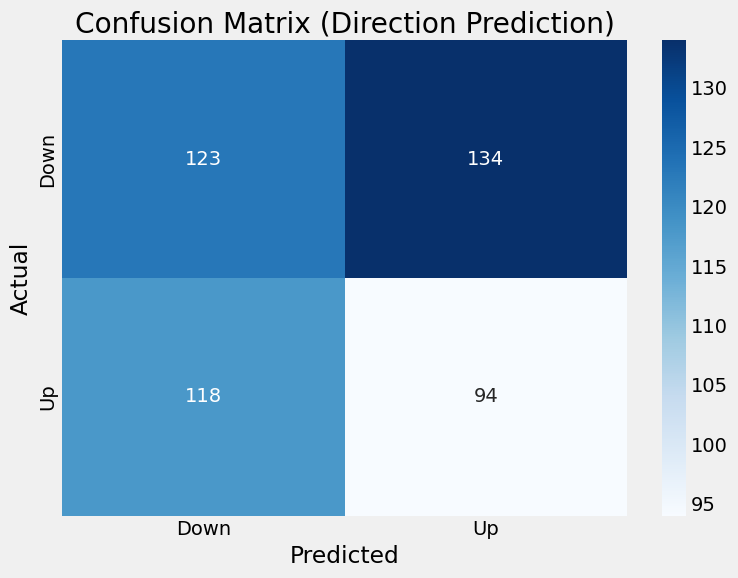

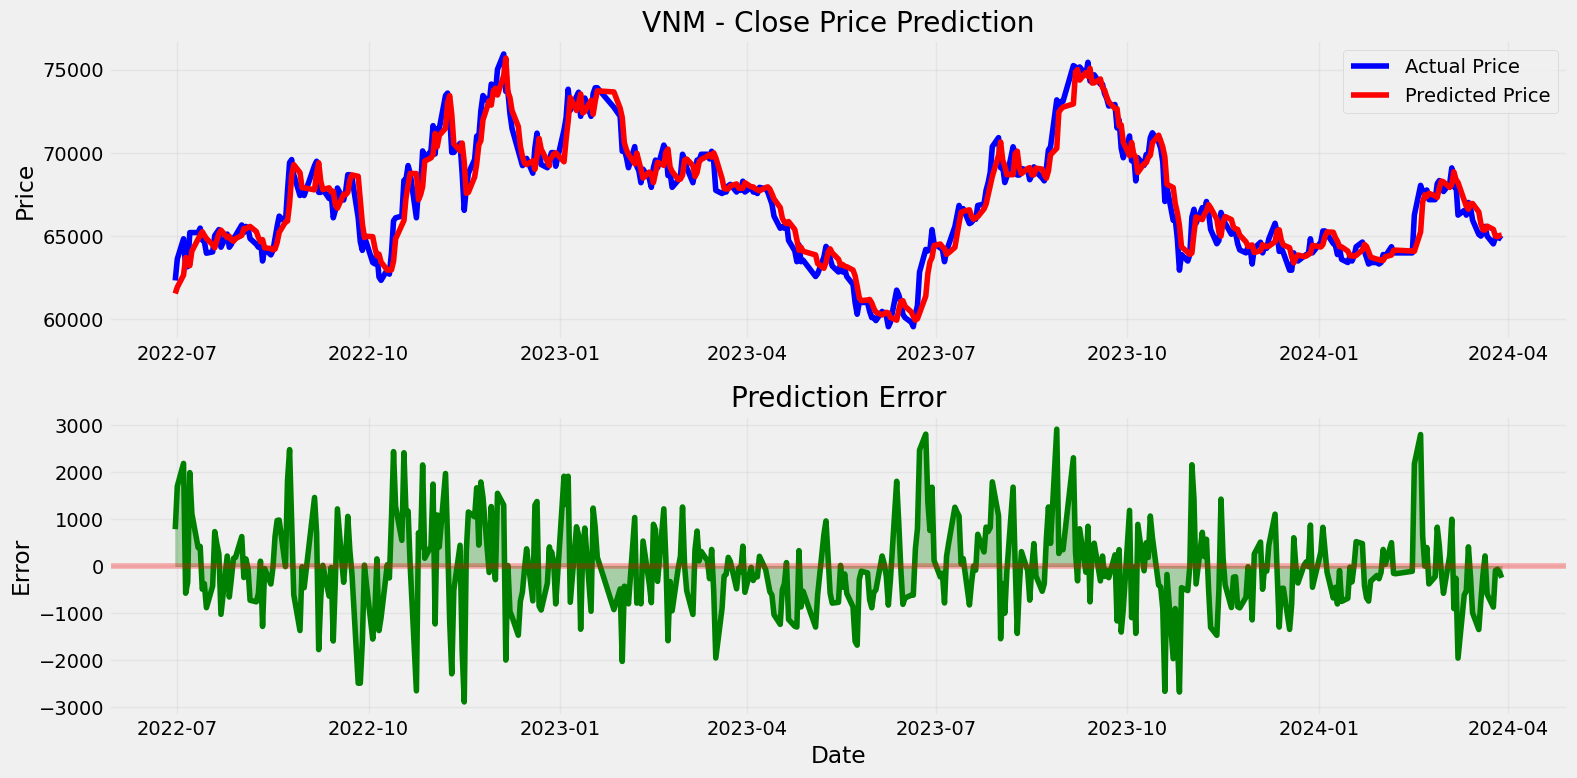

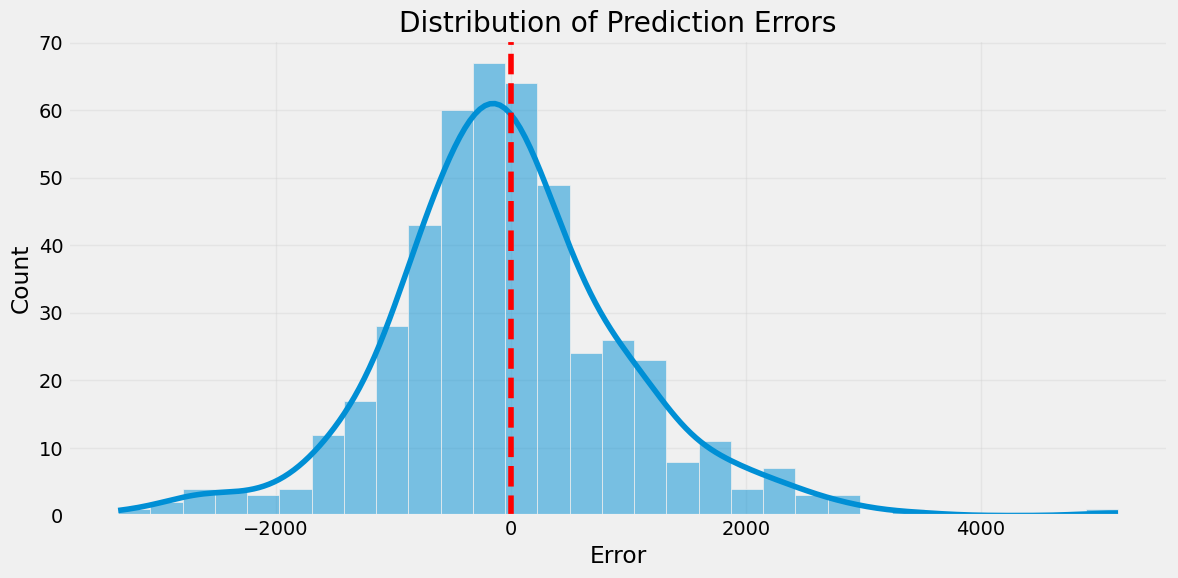

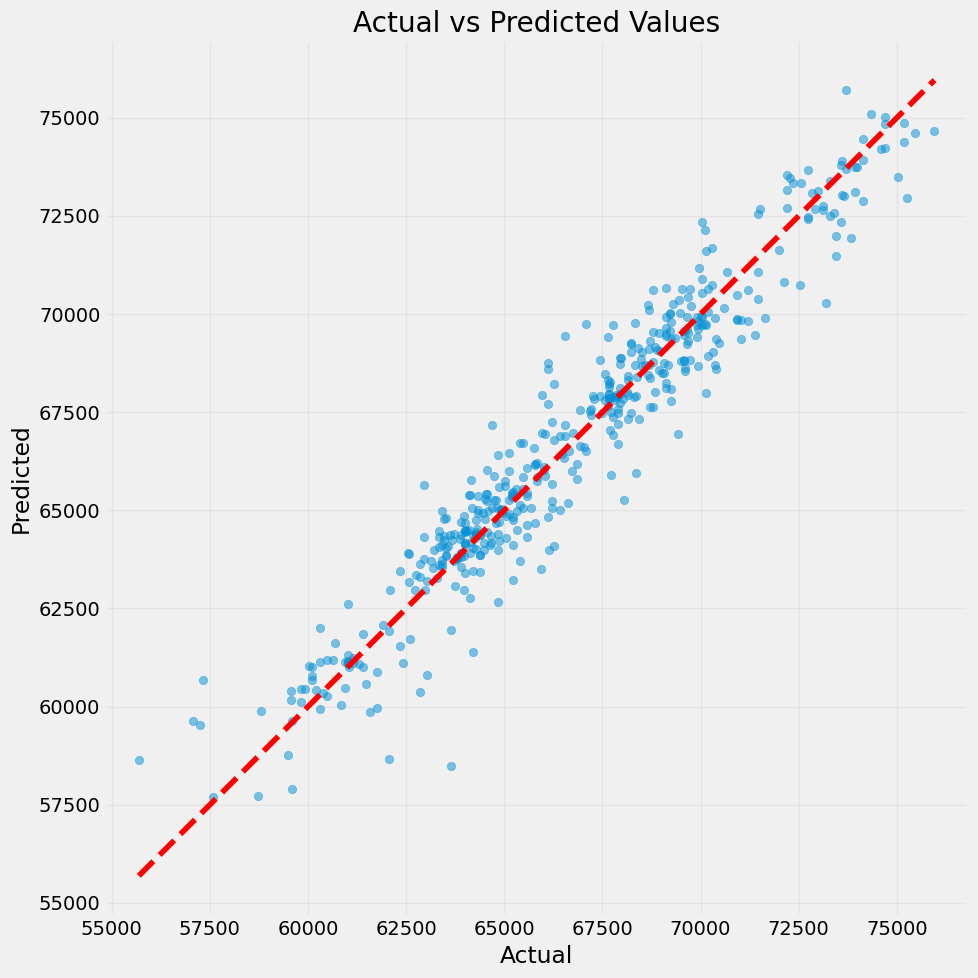


Dự đoán giá tiếp theo:
Giá dự đoán của ngày hôm qua: 65066.96

TÓM TẮT MÔ HÌNH DỰ ĐOÁN GIÁ Close CHO MÃ VNM
Số lượng dữ liệu train: 1999
Số lượng dữ liệu test: 500
MAE: 746.7437
RMSE: 1011.4958
Độ chính xác dự đoán xu hướng: 43.28%
F1 Score cho dự đoán xu hướng: 0.4273


In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Direction Prediction)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Biểu đồ giá thực tế so với giá dự kiến
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.plot(date_test_pd[30:], test_actual[30:], 'b-', label='Actual Price')
plt.plot(date_test_pd[30:], test_predictions[30:], 'r-', label='Predicted Price')
plt.title(f"{Macophieu} - {prop} Price Prediction")
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Biểu đồ dự đoán sai
plt.subplot(2, 1, 2)
plt.plot(date_test_pd[30:], results_df['Error'][30:], 'g-')
plt.fill_between(date_test_pd[30:], results_df['Error'][30:], 0, alpha=0.3, color='g')
plt.title('Prediction Error')
plt.ylabel('Error')
plt.xlabel('Date')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Phân phối lỗi đồ thị
plt.figure(figsize=(12, 6))
sns.histplot(results_df['Error'], kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tạo biểu đồ phân tán của giá trị thực tế so với giá trị dự đoán
plt.figure(figsize=(10, 10))
plt.scatter(test_actual, test_predictions, alpha=0.5)
plt.plot([test_actual.min(), test_actual.max()], [test_actual.min(), test_actual.max()], 'r--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Dự báo giá trị tiếp theo
print("\nDự đoán giá tiếp theo:")
print(f'Giá dự đoán của ngày hôm qua: {test_predictions[-1][0]:.2f}')

# Hiển thị báo cáo tóm tắt
print("\n" + "="*50)
print(f"TÓM TẮT MÔ HÌNH DỰ ĐOÁN GIÁ {prop} CHO MÃ {Macophieu}")
print("="*50)
print(f"Số lượng dữ liệu train: {len(train)}")
print(f"Số lượng dữ liệu test: {len(test)}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Độ chính xác dự đoán xu hướng: {direction_accuracy*100:.2f}%")
print(f"F1 Score cho dự đoán xu hướng: {f1:.4f}")
print("="*50)


=== Data Processing Results ===

1.1 Data Overview:
Total number of data points: 2499
Date range: from 2014-04-01 00:00:00 to 2024-04-01 00:00:00
Number of trading days: 2498

1.2 Statistical Summary of Price Data:
                Open           High            Low          Close
count    2499.000000    2499.000000    2499.000000    2499.000000
mean    68328.808323   68964.815526   67717.372549   68318.885954
std     18122.594374   18272.201203   17962.587662   18120.340015
min     29460.000000   29940.000000   29460.000000   29460.000000
25%     61200.000000   62085.000000   60440.000000   61150.000000
50%     71150.000000   71790.000000   70430.000000   71080.000000
75%     79590.000000   80170.000000   79030.000000   79665.000000
max    111030.000000  111290.000000  110310.000000  111180.000000

=== Generating Advanced Visualizations ===


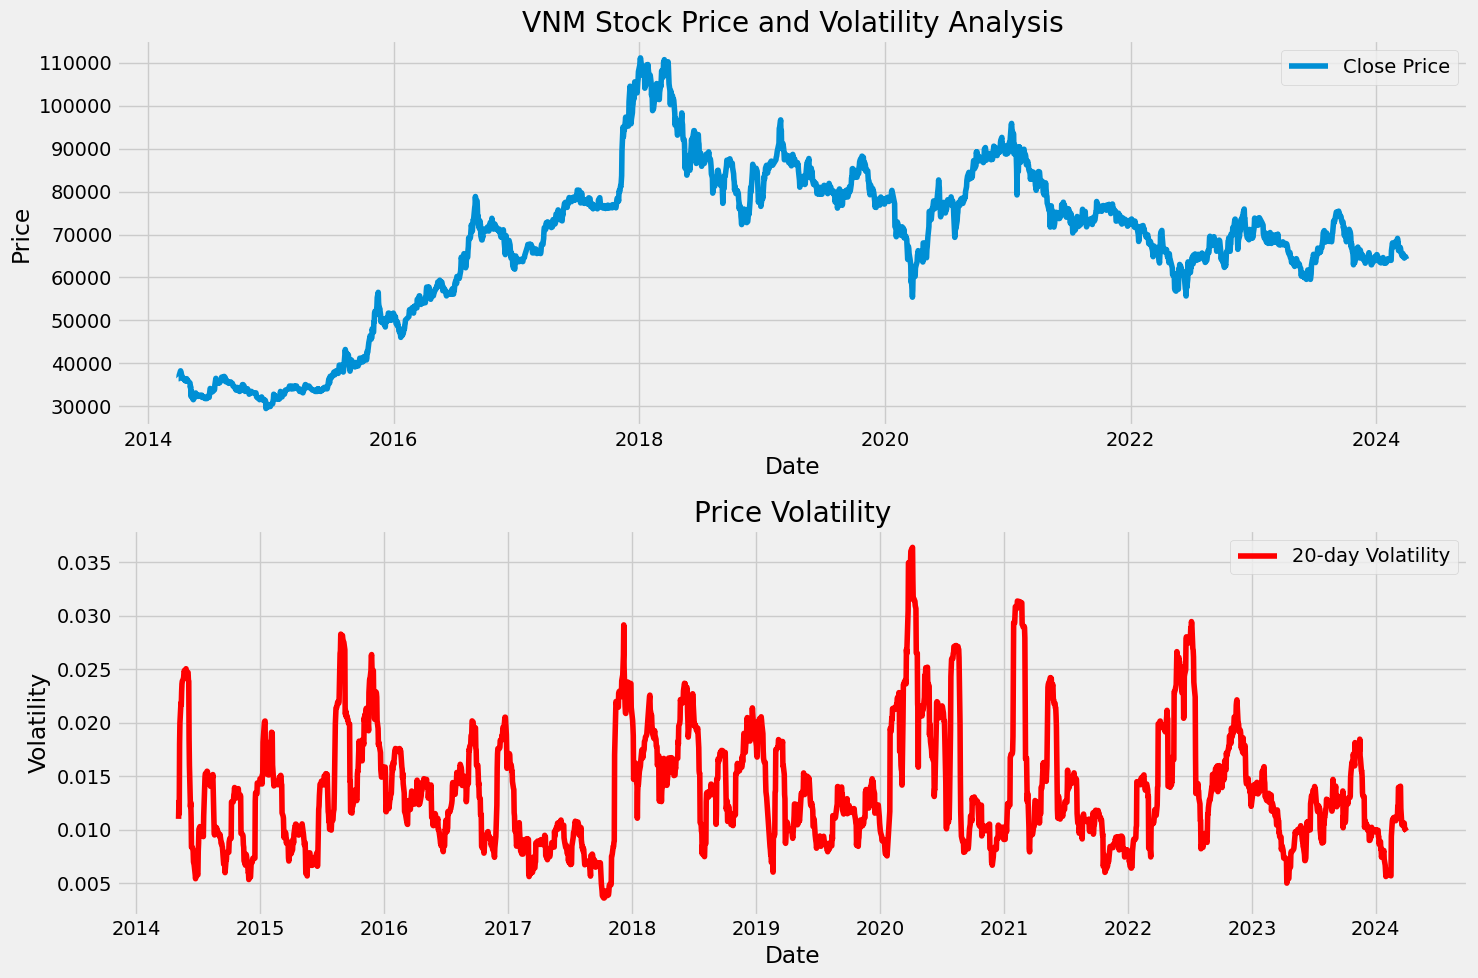

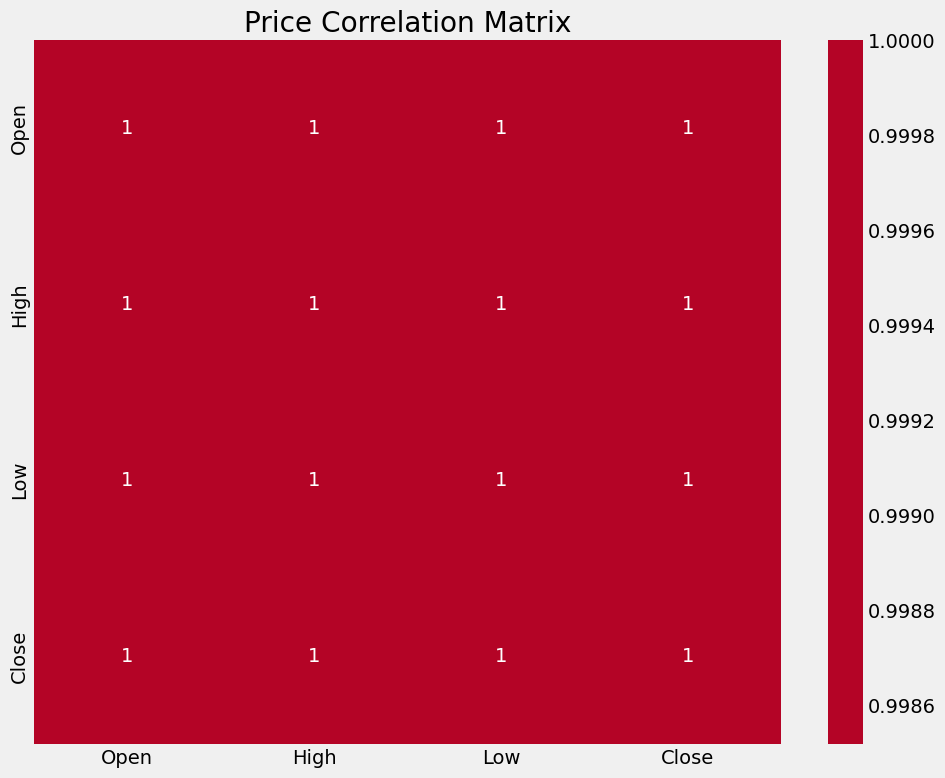


=== Model Performance Analysis ===

2.1 Model Performance Metrics:
            Metric        Value
               MAE 7.467437e+02
               MSE 1.023124e+06
              RMSE 1.011496e+03
                R² 9.285404e-01
          MAPE (%) 1.124794e+00
Direction Accuracy 4.328358e-01
         Precision 4.122807e-01
            Recall 4.433962e-01
          F1 Score 4.272727e-01


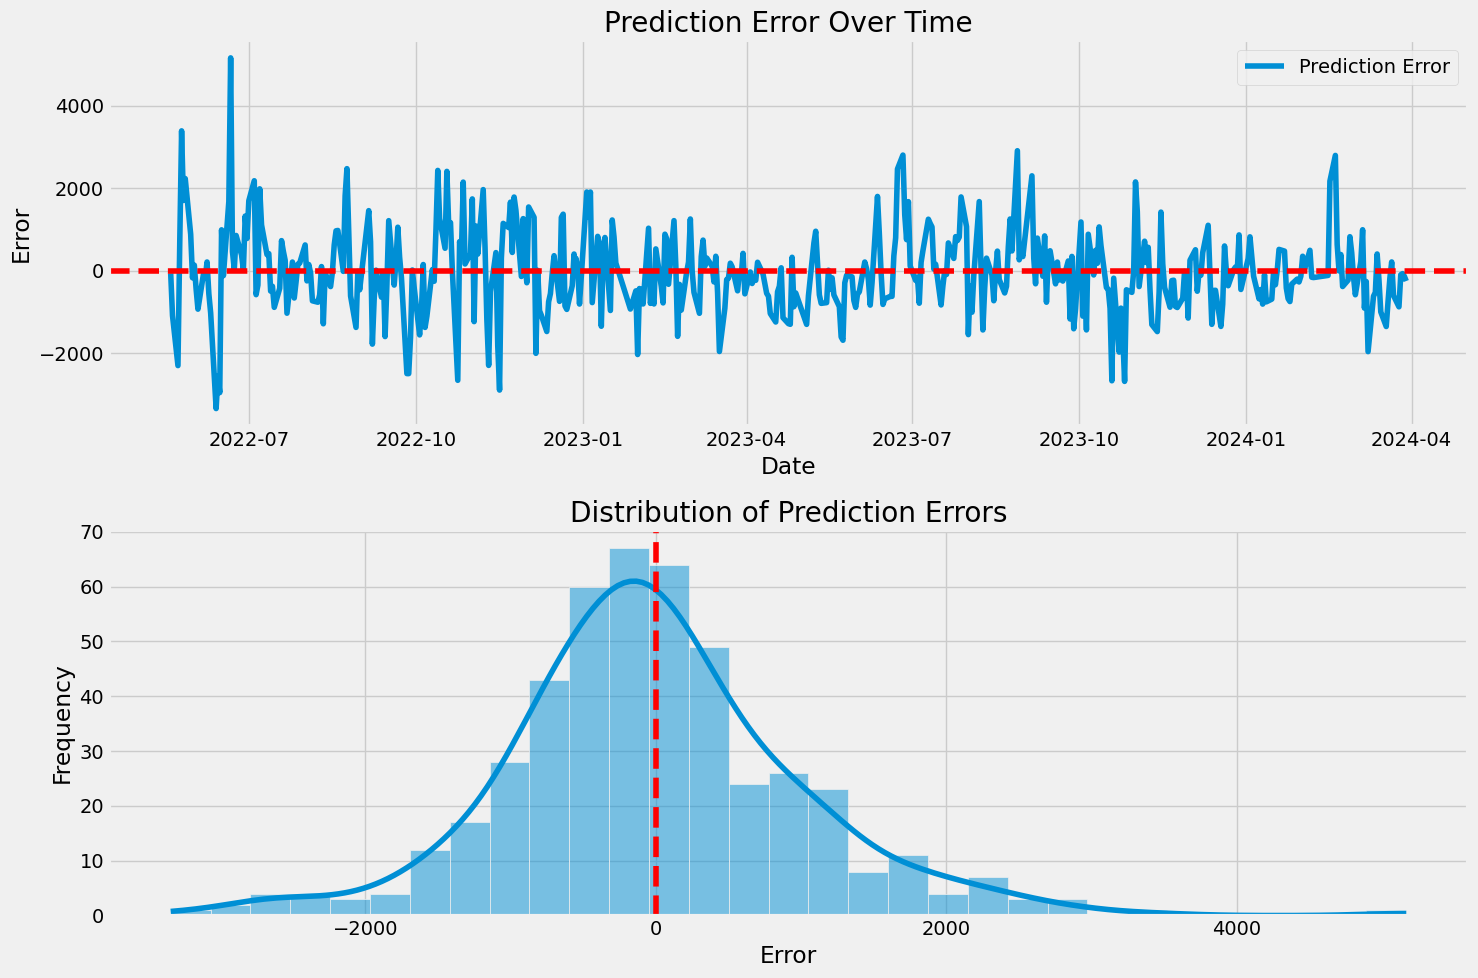


=== Research Findings and Discussion ===

3.1 Model Architecture Analysis:
Input sequence length: 30
Number of LSTM layers: 3
LSTM units per layer: 50
Dropout rate: 0.3
Cảnh báo: Độ dài không khớp - data['Market_Trend'].iloc[data_end:]: 500, results_df: 469

3.2 Performance by Market Trend:
                 Error           Absolute Error Percent Error
                  mean       std           mean          mean
Market_Trend                                                 
Down         -613.1183  733.5365       720.9936        1.1032
Up            678.7323  837.0112       777.9595        1.1510

=== Limitations and Future Research ===

4.1 Current Model Limitations:
1. Fixed sequence length may not capture all market patterns
2. Single feature prediction (only using price data)
3. No consideration of external factors (news, market sentiment)
4. Limited to historical data patterns

4.2 Recommendations for Future Research:
1. Incorporate multiple features (volume, technical indicators)


In [30]:
# ============== Phân tích ==============

# 1. Phân tích kết quả xử lý dữ liệu
print("\n=== Data Processing Results ===")
print("\n1.1 Data Overview:")
print(f"Total number of data points: {len(data)}")
print(f"Date range: from {data['Date'].min()} to {data['Date'].max()}")
print(f"Number of trading days: {len(data['Date'].unique())}")

# Tính toán số liệu thống kê cơ bản cho tất cả các cột giá
price_columns = ['Open', 'High', 'Low', 'Close']
print("\n1.2 Statistical Summary of Price Data:")
stats_df = data[price_columns].describe()
print(stats_df)

# Tính toán lợi nhuận và biến động hàng ngày
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# 2. Hình ảnh trực quan vip
print("\n=== Generating Advanced Visualizations ===")

# 2.1 Xu hướng giá và biến động
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title(f'{Macophieu} Stock Price and Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Volatility'], color='red', label='20-day Volatility')
plt.title('Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2.2 Phân tích tương quan
plt.figure(figsize=(10, 8))
correlation_matrix = data[price_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Price Correlation Matrix')
plt.tight_layout()
plt.show()

# 2.3 Phân tích hiệu suất mô hình
print("\n=== Model Performance Analysis ===")

# Tạo bảng số liệu hiệu suất toàn diện
performance_metrics = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)', 'Direction Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [mae, mse, rmse, r2, mape, direction_accuracy, precision, recall, f1]
}
performance_df = pd.DataFrame(performance_metrics)
print("\n2.1 Model Performance Metrics:")
print(performance_df.to_string(index=False))

# 2.4 Phân tích lỗi dự đoán
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(date_test_pd, results_df['Error'], label='Prediction Error')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
sns.histplot(results_df['Error'], kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Kết quả nghiên cứu và thảo luận
print("\n=== Research Findings and Discussion ===")

# 3.1 Phân tích kiến ​​trúc mô hình
print("\n3.1 Model Architecture Analysis:")
print(f"Input sequence length: {n_input}")
print(f"Number of LSTM layers: 3")
print(f"LSTM units per layer: 50")
print(f"Dropout rate: 0.3")

# 3.2 Phân tích hiệu suất theo điều kiện thị trường
# Tính toán xu hướng thị trường
data['Market_Trend'] = np.where(data['Close'] > data['Close'].shift(1), 'Up', 'Down')

# Đảm bảo độ dài phù hợp giữa Market_Trend và results_df
try:
    # Nếu độ dài của market_trend từ data_end trở đi khác với results_df
    if len(data['Market_Trend'].iloc[data_end:]) != len(results_df):
        print(f"Cảnh báo: Độ dài không khớp - data['Market_Trend'].iloc[data_end:]: {len(data['Market_Trend'].iloc[data_end:])}, results_df: {len(results_df)}")
        # Tạo một chuỗi trend mới dựa trên dữ liệu trong results_df
        results_df['Market_Trend'] = np.where(results_df['Actual'] > results_df['Actual'].shift(1), 'Up', 'Down')
    else:
        # Nếu độ dài khớp nhau, gán trực tiếp
        results_df['Market_Trend'] = data['Market_Trend'].iloc[data_end:].values
except Exception as e:
    print(f"Lỗi khi gán Market_Trend: {e}")
    # Sử dụng phương pháp thay thế an toàn
    results_df['Market_Trend'] = np.where(results_df['Actual'] > results_df['Actual'].shift(1), 'Up', 'Down')

# Phân tích hiệu suất theo xu hướng thị trường
trend_performance = results_df.groupby('Market_Trend').agg({
    'Error': ['mean', 'std'],
    'Absolute Error': 'mean',
    'Percent Error': 'mean'
}).round(4)

print("\n3.2 Performance by Market Trend:")
print(trend_performance)

# 4. Những hạn chế và nghiên cứu trong tương lai
print("\n=== Limitations and Future Research ===")
print("\n4.1 Current Model Limitations:")
limitations = [
    "Fixed sequence length may not capture all market patterns",
    "Single feature prediction (only using price data)",
    "No consideration of external factors (news, market sentiment)",
    "Limited to historical data patterns"
]
for i, limitation in enumerate(limitations, 1):
    print(f"{i}. {limitation}")

print("\n4.2 Recommendations for Future Research:")
recommendations = [
    "Incorporate multiple features (volume, technical indicators)",
    "Implement attention mechanisms for better pattern recognition",
    "Include sentiment analysis from news and social media",
    "Explore ensemble methods combining multiple models",
    "Implement adaptive sequence lengths based on market volatility"
]
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

